In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning

# Step 1: Load Data
data = pd.read_csv(r"C:\Users\Sambhavi Roy\Downloads\Dataset_unique_no_map.csv")

# Step 2: Data Preprocessing
label_encoder = LabelEncoder()
data['Disease'] = label_encoder.fit_transform(data['Disease'])

# Step 3: Feature Selection
X = data.iloc[:, 1:]  # All columns except 'Disease'
y = data['Disease']   # Disease column

# Step 4: Stratified Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Create and Train the Logistic Regression model with increased iterations
logistic_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga', class_weight='balanced')  # Increased max_iter and solver set to 'saga'
logistic_model.fit(X_train, y_train)

# Step 7: Cross-Validation with increased iterations
warnings.simplefilter('always', ConvergenceWarning)  # Show convergence warnings
cv_scores = cross_val_score(logistic_model, X, y, cv=10)  # 10-Fold Cross Validation
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

# Step 8: Make predictions
y_pred = logistic_model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag

Cross-Validation Accuracy: 0.89 ± 0.07
Accuracy: 0.92
Confusion Matrix:
[[33  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        36
           1       0.47      0.69      0.56        36
           2       0.86      1.00      0.92        36
           3       1.00      0.78      0.88        36
           4       0.97      0.94      0.96        36
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        36
           7       0.95      0.97      0.96        36
           8       1.00      1.00      1.00        36
           9       1.00      0.94      0.97        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       0.92      1.00      0.96   

c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-val accuracy lesser means overfitting

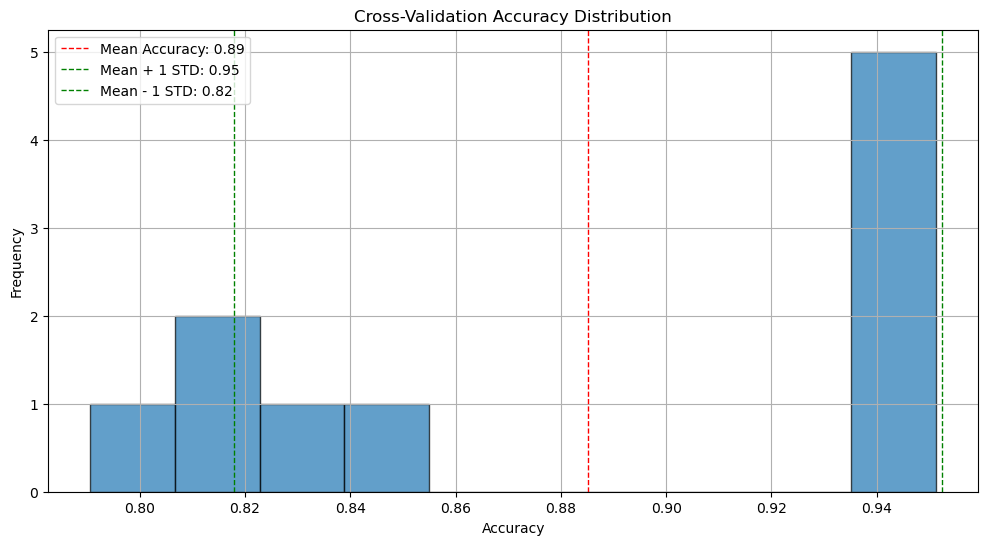

In [7]:
import matplotlib.pyplot as plt

# Generate the histogram of cross-validation accuracies
plt.figure(figsize=(12, 6))
plt.hist(cv_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title('Cross-Validation Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(True)

# Add mean and standard deviation lines
mean_accuracy = cv_scores.mean()
std_dev = cv_scores.std()
plt.axvline(mean_accuracy, color='r', linestyle='dashed', linewidth=1, label=f'Mean Accuracy: {mean_accuracy:.2f}')
plt.axvline(mean_accuracy + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'Mean + 1 STD: {mean_accuracy + std_dev:.2f}')
plt.axvline(mean_accuracy - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'Mean - 1 STD: {mean_accuracy - std_dev:.2f}')
plt.legend()

plt.show()


SMOTE

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression with Class Weights
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Test Set Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Test Set Accuracy: 0.92
Confusion Matrix:
[[33  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        36
           1       0.47      0.69      0.56        36
           2       0.86      1.00      0.92        36
           3       1.00      0.78      0.88        36
           4       0.97      0.94      0.96        36
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        36
           7       0.95      0.97      0.96        36
           8       1.00      1.00      1.00        36
           9       1.00      0.94      0.97        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       0.92      1.00      0.96        36
          13       0.8

In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate Best Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Test Set Accuracy with Best Model: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag

Best parameters: {'C': 100, 'solver': 'saga'}
Best cross-validation score: 0.9680612279339791
Test Set Accuracy with Best Model: 0.98
Confusion Matrix:
[[32  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 ...
 [ 0  1  0 ... 35  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.97      0.81      0.88        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      0.94      0.97        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       0.95      0.97      0.96        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1

c:\Users\Sambhavi Roy\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


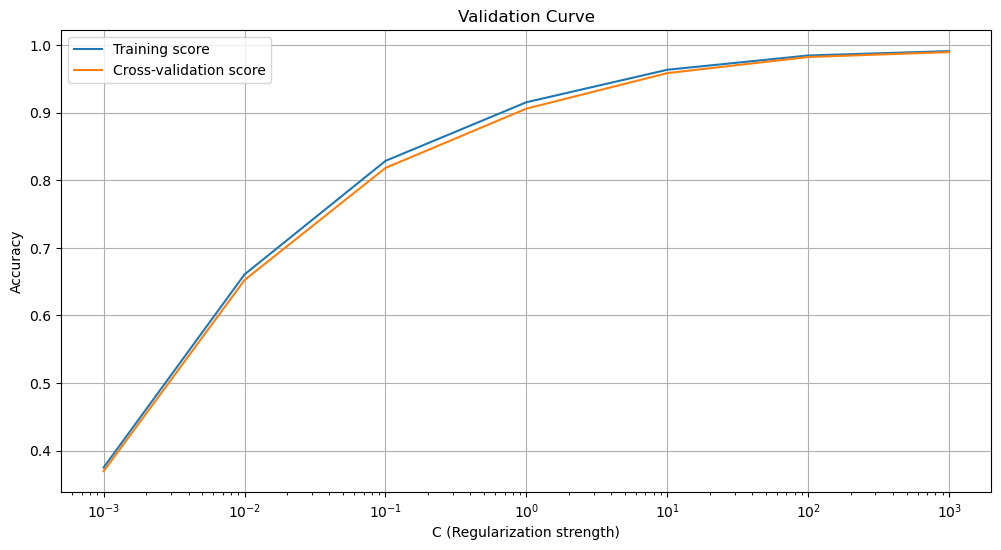

In [12]:
from sklearn.model_selection import validation_curve
import numpy as np

# Define parameter range
param_range = np.logspace(-3, 3, 7)

# Compute validation curve
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=1000), X_train_resampled, y_train_resampled, 
    param_name='C', param_range=param_range, cv=5
)

# Plot Validation Curve
plt.figure(figsize=(12, 6))
plt.semilogx(param_range, train_scores.mean(axis=1), label='Training score')
plt.semilogx(param_range, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()


Above code has accuracy of 98% on test set and about 97% on cross-validation set which means no overfitting

In [14]:
import numpy as np

# Identify misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_idx]
misclassified_labels = y_test.iloc[misclassified_idx]
print(f'Number of Misclassified Samples: {len(misclassified_idx)}')
print(f'Misclassified Labels: {misclassified_labels.values}')


Number of Misclassified Samples: 36
Misclassified Labels: [33 23 38 33  0 33 33  7  1  0  1 35  1 33 35 33 35 35  0  1  1  4 33  1
 35 23  0 33 33 35  1 33  4 35 33 33]
